# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from FF_symbolic import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from FF_symbolic import DiagramasWninj,DiagramasniWW,DiagramasniWH,DiagramasniHW
from FF_symbolic import DiagramasHninj,DiagramasniHH
from FF_symbolic import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from FF_symbolic import j as jj
from FF_symbolic import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 80; mp.pretty = True

In [6]:
import numpy as np

In [7]:
import subprocess as s

In [8]:
from multiprocessing import Pool
from time import time

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

### Form factor with one fermion in the loop.

In [12]:
# for D in TrianglesOneFermion:
#     display(D.AL().atoms(Symbol))

#### AL one fermion 

In [13]:
from OneLoopLFVHD.data import ml

In [14]:
ma,mb = symbols('m_a,m_b',positive=True)
# valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
# valores_H ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
valoresSM ={mW:mpf('80.379'),g:(2*mpf('80.379'))/mpf('246')}

# cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}
cambios_lab = lambda mla,mlb:{lfvhd.mi:mla,lfvhd.mj:mlb}



Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

In [15]:
C0_sp, C1_sp, C2_sp, B120_sp, B10_sp,B11_sp,B20_sp,B21_sp = symbols('C0, C1, C2, B120, B10,B11,B20,B21')
cambios_pave_sympy = lambda M0,M1,M2: {lfvhd.C0(M0,M1,M2):C0_sp,lfvhd.C1(M0,M1,M2):C1_sp,
                                      lfvhd.C2(M0,M1,M2):C2_sp,lfvhd.B12_0(M1,M2):B120_sp,
                                      lfvhd.B1_0(M0,M1):B10_sp,lfvhd.B1_1(M0,M1):B11_sp,
                                      lfvhd.B2_0(M0,M2):B20_sp,lfvhd.B2_1(M0,M2):B21_sp}
cambiosniWW = cambios_pave_sympy(mn[i],mW,mW)
cambiosniWH = cambios_pave_sympy(mn[i],mW,mHpm)
cambiosniHW = cambios_pave_sympy(mn[i],mHpm,mW)
cambiosniHH = cambios_pave_sympy(mn[i],mHpm,mHpm)

cambiosWninj = cambios_pave_sympy(mW,mn[i],mn[jj])
cambiosHninj = cambios_pave_sympy(mHpm,mn[i],mn[jj])

#cambiosniWW

In [16]:
import OneLoopLFVHD.LFVHDFeynG_mpmath2 as lfvhd_mp# B1_0, B2_0, B1_1, B2_1, B12_0, C0, C1, C2

### Diagrams with One Fermion

#### Diagrams with $n_i WW$ numeric

In [28]:
####################
mW_val = valoresSM[mW]
C0_mp_niWW = lambda ms,mni_: lfvhd_mp.C0(ms,mni_,mW_val,mW_val)
C1_mp_niWW = lambda ms,mni_,mla: lfvhd_mp.C1(ms,mla,mni_,mW_val,mW_val)
C2_mp_niWW = lambda ms,mni_,mlb: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mW_val)
B120_mp_niWW = lambda ms: lfvhd_mp.B12_0(ms,mW_val,mW_val)
B10_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_0(mla,mni_,mW_val)
B11_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_1(mla,mni_,mW_val)
B20_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_0(mlb,mni_,mW_val)
B21_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_1(mlb,mni_,mW_val)

FF_list_niWW = []
for dia_niWW in DiagramasniWW:
    A_sp_niWWL = lambda mla,mlb: dia_niWW.AL().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWWR = lambda mla,mlb: dia_niWW.AR().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)


    #display(A_sp_niWWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niWWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWL(mla,mlb),'mpmath')

    A_lamb_niWWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWR(mla,mlb),'mpmath')
    #print(A_lamb_niWWL(ml[2],ml[3])(1,2,3,4,5,6,7,8,9,10,11,12,13,14))


    def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return  A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    FF_list_niWW.append({'L':FFniWWL,'R':FFniWWR})
    

In [29]:
%%time
(
    FF_list_niWW[0]['L'](mpf('125.10'),2,3,4,5,6,7,8),
    FF_list_niWW[0]['R'](mpf('125.10'),2,3,4,5,6,7,8)
)

CPU times: user 1.07 s, sys: 0 ns, total: 1.07 s
Wall time: 1.09 s


(-0.000071467763684591091970099230113171227717941258139891604327269425120638084533901643,
 -0.00007142927748439662077718032879884293845337609638931117236903147334185704219854227)

In [52]:
###################3
# def diagramas_niWW_func_dict(ms,mla,mlb,m6):
#     C0mp =  C0_mp_niWW(ms,mni),
#     C1mp =  C1_mp_niWW(ms,mni,mla),
#     C2mp =  C2_mp_niWW(ms,mni,mlb),
#     B120mp =  B120_mp_niWW(ms),
#     B10mp =  B10_mp_niWW(mni,mla),
#     B11mp =  B11_mp_niWW(mni,mla),
#     B20mp =  B20_mp_niWW(mni,mlb),
#     B21mp =  B21_mp_niWW(mni,mlb)
#     FF_list_niWW = []

#     #lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ, 
#     #C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp
#     for A_dia_niWW in FF_list_niWW:
#         def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
#             return A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
#                     C0mp,C1mp,C2mp,B120mp,B10mp,B11mp,B20mp,B21mp)

#         def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
#             return A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
#                     C0mp,C1mp,C2mp,B120mp,B10mp,B11mp,B20mp,B21mp)


#     return FF_list_niWW


#diagramas_niWW_func_dict(125,1,2,3)


#### Diagrams with $n_i HH$ numeric

In [30]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mHpm)
C1_mp_niHH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mHpm)
C2_mp_niHH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mHpm)
B10_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_0(mla,mni_,mHpm)
B11_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_1(mla,mni_,mHpm)
B20_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_0(mlb,mni_,mHpm)
B21_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_1(mlb,mni_,mHpm)

###################3
FF_list_niHH = []
for dia_niHH in DiagramasniHH:
    A_sp_niHHL = lambda mla,mlb: dia_niHH.AL().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHHR = lambda mla,mlb: dia_niHH.AR().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niHHL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHL(mla,mlb),'mpmath')
    
    A_lamb_niHHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHR(mla,mlb),'mpmath')
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniHHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    def FFniHHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    FF_list_niHH.append({'L':FFniHHL,'R':FFniHHR})

In [33]:
(
    FF_list_niHH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16),
    FF_list_niHH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16)
)

((-0.000000000000047500694437883334053559689281938324690014047870947545178873981810238639959485919 + 0.0j),
 (-0.00000000000004236342443704504832816313444557555323754466162073906839989234059953380424683953 + 0.0j))

#### Diagrams with $n_i WH$ numeric

In [36]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niWH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mW_val,mHpm)
C1_mp_niWH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mW_val,mHpm)
C2_mp_niWH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mHpm)

###################3

FF_list_niWH = []
for dia_niWH in DiagramasniWH:
    A_sp_niWHL = lambda mla,mlb: dia_niWH.AL().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWHR = lambda mla,mlb: dia_niWH.AR().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niWHR(ml[1],ml[2]))
    A_lamb_niWHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHL(mla,mlb),'mpmath')
    
    A_lamb_niWHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniWHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    def FFniWHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    FF_list_niWH.append({'L':FFniWHL,'R':FFniWHR})

In [38]:
(
    FF_list_niWH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niWH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((0.00000000000073997220271423279851159399645139011688436697282719331194065898471723532721595323 - 0.000000000030972455173014969262919567427708660342087234820823663627042942735982246980222553j),
 (0.000000000002215994564486677475542967233956115779096358081128814300387225851793049368898589 + 0.000000000047450065059135104813611815740530587919320596989700102249485532444365352085725578j))

#### Diagrams with $n_i HW$ numeric

In [39]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHW = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mW_val)
C1_mp_niHW = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mW_val)
C2_mp_niHW = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mW_val)

###################3

FF_list_niHW = []
for dia_niHW in DiagramasniHW:
    A_sp_niHWL = lambda mla,mlb: dia_niHW.AL().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHWR = lambda mla,mlb: dia_niHW.AR().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    #display(A_sp_niHWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWL(mla,mlb),'mpmath')
    
    A_lamb_niHWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))

    def FFniHWL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    def FFniHWR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    FF_list_niHW.append({'L':FFniHWL,'R':FFniHWR})

In [40]:
(
    FF_list_niHW[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niHW[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((0.0000000000016186245566964131764966253216693156687465375910882841897290017110502929852561873 + 0.000000000027856042353106289568511996388749767739366220421936040626975005648797662117866264j),
 (0.000000000003010064408498334182875648248803695826056262911660553844910987404979832900835521 - 0.000000000040901945715217446334216080633777774287372376785366714049207291112121101703790412j))

In [26]:
# for FF_dict in FF_list_niWH:
#     #display(FF_dict['L'])    
#     print(FF_dict['L'](mpf('125.10'),2,3,4,5,6,7,8,9,10))

In [43]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)

def sum_diagramsOne(m6,aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
#     FFOne = 0
#     for k in range(1,7):
#         for FF_dict in FF_list_niWW:
#             FFOne += FF_dict[quirality](ms_val,mla,mlb,
#                                    mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
#                                    Xi_phi,xi_lphi)
        
#         for FF_dict in FF_list_niHW:
#             FFOne += FF_dict[quirality](ms_val,mla,mlb,
#                                    mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
#                                    mHpm,xi_lA,xi_nA,etaphi)
        
#         for FF_dict in FF_list_niWH:
#             FFOne += FF_dict[quirality](ms_val,mla,mlb,
#                                    mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
#                                    mHpm,xi_lA,xi_nA,etaphi)
            
#         for FF_dict in FF_list_niHH:
#             FFOne += FF_dict[quirality](ms_val,mla,mlb,
#                                    mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
#                                    mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
    
    FFOne_list = []
    for k in range(1,7):
        for FF_dict in FF_list_niWW:
            #mpf('125.10'),2,3,4,5,6,7,8,9,10,11,12,13,14
            FFOne_list.append(FF_dict[quirality](ms_val,mla,mlb,
                                   mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                                   Xi_phi,xi_lphi))
        
        for FF_dict in FF_list_niHW:
            FFOne_list.append(FF_dict[quirality](ms_val,mla,mlb,
                                   mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                                   mHpm,xi_lA,xi_nA,etaphi))
        
        for FF_dict in FF_list_niWH:
            FFOne_list.append(FF_dict[quirality](ms_val,mla,mlb,
                                   mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                                   mHpm,xi_lA,xi_nA,etaphi))
            
        for FF_dict in FF_list_niHH:
            FFOne_list.append(FF_dict[quirality](ms_val,mla,mlb,
                                   mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                                   mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi))
    FFOne = sum(FFOne_list)
    return FFOne

In [44]:
%%time

sum_diagramsOne(mpf('1e-12'),1,2,mpf('125.10'),mpf('500'),6,7,
                    8,9,10,11,12,13,14,15,16,'L')

CPU times: user 56.3 s, sys: 110 ms, total: 56.4 s
Wall time: 56.6 s


(-0.00000000000098311733504164715232806194216475941075185002749428015639793098353128442204124192 - 0.0000000000022398555658375143812009739136622924660461001639974730720790247141391651077065481j)

In [45]:
from modelos_2HDM import typeI_h, typeII_h, Lepton_specific_h,Flipped_h

In [46]:
def numeric_sum_diagramsOne(ms,a,b,mHpm, mA, alpha, beta, l5,
                            type_2HDM=typeI_h,quirality='L'):
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    Kphi =  4*mA**2 - 3*ms**2- 2*mHpm**2
    Qphi = ms**2 - 2*mHpm**2
    
    Yuk_common = type_2HDM(alpha,beta)
    xi_lphi, xi_nphi, xi_lA, xi_nA, Xi_phi, etaphi,rhophi,Dphi = Yuk_common
    def FFOne(m6):
        #sum_diagramsOne(m6,aa,bb,ms_val,mHpm,beta,l5,
        #           xi_lphi,xi_lA,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L')
        out = sum_diagramsOne(m6,a,b,ms,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L')
        return out
    return FFOne

In [47]:
%%time
nprint(numeric_sum_diagramsOne(mpf('500.1'),1,2,mpf('550'), mpf('600'), 0.1, 0.2, 0.1,
                               type_2HDM=typeI_h,quirality='L')(mpf('1e-12')))

(4.20145e-33 - 3.52905e-33j)
CPU times: user 50.7 s, sys: 43.6 ms, total: 50.7 s
Wall time: 51 s


**Elegir modelos**

In [51]:
def ALOneTot23(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,2,3,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='L')(m6)
def AROneTot23(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,2,3,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='R')(m6)


def ALOneTot13(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,1,3,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='L')(m6)
def AROneTot13(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,1,3,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='R')(m6)


def ALOneTot12(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,1,2,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='L')(m6)
def AROneTot12(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagramsOne(ms,1,2,mHpm, mA, alpha, beta, l5,
                                 type_2HDM=type_2HDM,quirality='R')(m6)


In [54]:
%%time
nprint(ALOneTot13(mpf('125.1'),mpf('1e-12'),mpf('500'), mpf('600'), 0.1, 0.2, 0.2,
type_2HDM=typeI_h))

(-8.87175e-12 - 2.40869e-12j)
CPU times: user 56.1 s, sys: 11.9 ms, total: 56.1 s
Wall time: 56.2 s


In [55]:
n = 10
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [61]:
def ALOneTot23_caso1(m6):
    return ALOneTot23(mpf('125.1'),m6,mpf('500'), mpf('600'), 0.1, 0.2, mpf('1e-10'),
                    type_2HDM=typeII_h)
    
def ALOneTot13_caso1(m6):
    return ALOneTot13(mpf('125.1'),m6,mpf('500'), mpf('600'), 0.1, 0.2, mpf('1e-10'),
                    type_2HDM=typeII_h)
def ALOneTot12_caso1(m6):
    return ALOneTot12(mpf('125.1'),m6,mpf('500'), mpf('600'), 0.1, 0.2, mpf('1e-10'),
                    type_2HDM=typeII_h)

In [62]:
%%time
YLOne23 = speedup_array(ALOneTot23_caso1,m6np)

YLOne13 = speedup_array(ALOneTot13_caso1,m6np)

YLOne12 = speedup_array(ALOneTot12_caso1,m6np)

CPU times: user 2.35 s, sys: 903 ms, total: 3.25 s
Wall time: 15min 42s


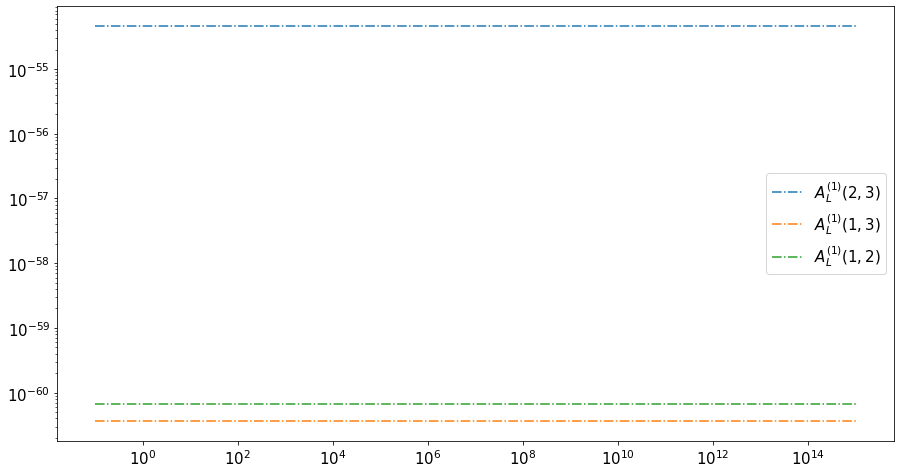

In [60]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),abs(YLOne23)**2,'-.',label='$A_L^{(1)}(2,3)$')
#plt.loglog(np.real(m6np),abs(YLOne32)**2,'--',label='$A_L^{(1)}(3,2)$')

plt.loglog(np.real(m6np),abs(YLOne13)**2,'-.',label='$A_L^{(1)}(1,3)$')
#plt.loglog(np.real(m6np),abs(YLOne31)**2,'--',label='$A_L^{(1)}(3,1)$')

plt.loglog(np.real(m6np),abs(YLOne12)**2,'-.',label='$A_L^{(1)}(1,2)$')
#plt.loglog(np.real(m6np),abs(YLOne21)**2,'--',label='$A_L^{(1)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [29]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [30]:
C0_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.C0(ms,mW_val,mni_,mnj_)
C1_mp_Wninj = lambda ms,mni_,mnj_,mla: lfvhd_mp.C1(ms,mla,mW_val,mni_,mnj_)
C2_mp_Wninj = lambda ms,mni_,mnj_,mlb: lfvhd_mp.C2(ms,mlb,mW_val,mni_,mnj_)
B120_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)
# B10_mp_Wninj = lambda mni_,mla: lfvhd_mp.B1_0(mla,mW_val,mni_)
# B11_mp_Wninj = lambda mni_,mla: lfvhd_mp.B1_1(mla,mW_val,mni_)
# B20_mp_Wninj = lambda mnj_,mlb: lfvhd_mp.B2_0(mlb,mW_val,mnj_)
# B21_mp_Wninj = lambda mnj_,mlb: lfvhd_mp.B2_1(mlb,mW_val,mnj_)

###################3
FF_list_Wninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Wninj in DiagramasWninj:
    A_sp_WninjL = lambda mla,mlb: dia_Wninj.AL().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_WninjR = lambda mla,mlb: dia_Wninj.AR().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_WninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_WninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C1_sp,B120_sp], A_sp_WninjL(mla,mlb),'mpmath')
    
    A_lamb_WninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C2_sp,B120_sp], A_sp_WninjR(mla,mlb),'mpmath')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFWninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),C1_mp_Wninj(ms_val,mni_,mnj_,mla),
            B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    def FFWninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),
            C2_mp_Wninj(ms_val,mni_,mnj_,mlb),B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    
    
    
    FF_list_Wninj.append({'L':FFWninjL,'R':FFWninjR})#

In [44]:
%%time
(
    FF_list_Wninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_Wninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

CPU times: user 1.11 s, sys: 8.08 ms, total: 1.11 s
Wall time: 1.12 s


((0.0000000000017705687573692845226830342322575913284629938031043117383230022397465281147393444 - 0.000000000027896947980710833082089199285464130145801616380458756295392473804415769560146124j),
 (0.0000000000022906273006951853616847919270021939857193310932257760616450724898201590038145356 - 0.000000000039382506274601512958113572101742007705343883191515987986071884978427412632233882j))

In [31]:
C0_mp_Hninj = lambda ms,mni_,mnj_,mHpm: lfvhd_mp.C0(ms,mHpm,mni_,mnj_)
C1_mp_Hninj = lambda ms,mni_,mnj_,mla,mHpm: lfvhd_mp.C1(ms,mla,mHpm,mni_,mnj_)
C2_mp_Hninj = lambda ms,mni_,mnj_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mHpm,mni_,mnj_)
B120_mp_Hninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)
# B10_mp_Hninj = lambda mni_,mla,mHpm: lfvhd_mp.B1_0(mla,mHpm,mni_)
# B11_mp_Hninj = lambda mni_,mla,mHpm: lfvhd_mp.B1_1(mla,mHpm,mni_)
# B20_mp_Hninj = lambda mnj_,mlb,mHpm: lfvhd_mp.B2_0(mlb,mHpm,mnj_)
# B21_mp_Hninj = lambda mnj_,mlb,mHpm: lfvhd_mp.B2_1(mlb,mHpm,mnj_)

###################3
FF_list_Hninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Hninj in DiagramasHninj:
    A_sp_HninjL = lambda mla,mlb: dia_Hninj.AL().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_HninjR = lambda mla,mlb: dia_Hninj.AR().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_HninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_HninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
                ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp], A_sp_HninjL(mla,mlb),'mpmath')
    
    A_lamb_HninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
                ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp], A_sp_HninjR(mla,mlb),'mpmath')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFHninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                 xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    def FFHninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                 xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    
    FF_list_Hninj.append({'L':FFHninjL,'R':FFHninjR})#

In [54]:
%%time
(
    FF_list_Hninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13),
    FF_list_Hninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13)
)

CPU times: user 7.11 s, sys: 19.9 ms, total: 7.13 s
Wall time: 7.13 s


((0.0000000000003567424273110642758754818137234537643188627944602530353340147113119297077800788 - 0.00000000000014647975419882433747957415124397106246415294901433072809760218424470669069469899j),
 (0.00000000000043373979285590803253763899246677015633638807064745524500178254147041359767655619 - 0.00000000000017807838430186369275684514226616192034594327132568622038835301673397475388937348j))

**Cambiar modelo o scalar**

In [32]:
# Wninj:   ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi
# Hninj:   ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,xi_nphi,xi_nA,xi_lA
def sum_diagramsTwo(m6,a,b,ms_val,mHpm,xi_nphi,xi_nA,xi_lA,quirality='L'):
    FFTwo = 0
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])
    
    mla = ml[a]
    mlb = ml[b]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
        
    for p in range(1,7):
        for q in range(1,7):
            for FF_dict in FF_list_Wninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                        mnk[p-1],mnk[q-1],Unu[b-1,q-1],Unu_dagger[p-1,a-1],
                  Cij(p-1,q-1),conj(Cij(p-1,q-1)),xi_nphi)
                
            for FF_dict in FF_list_Hninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                                            mnk[p-1],mnk[q-1],
                                            Unu[b-1,q-1],Unu_dagger[p-1,a-1],
                                            Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                                            mHpm,xi_nphi,xi_nA,xi_lA)
        
    return FFTwo

In [63]:
# %%time
# sum_diagramsTwo(mpf('1e-12'),1,2,mpf('125.1'),mpf('500.0'),6,7,8,quirality='L')

CPU times: user 2min 41s, sys: 300 ms, total: 2min 42s
Wall time: 2min 42s


(-8.13532710660670173660903551608e-34 + 6.90218697696807622602304726228e-33j)

In [33]:
def numeric_sum_diagramsTwo(ms,a,b,mHpm, alpha, beta,
                            H_a='h',type_2HDM='I',quirality='L'):
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    type_2HDM = type_2HDM.upper()
    if type_2HDM == 'I':
        Yuk_common = typeI(alpha,beta,H_a)
    elif type_2HDM == 'II':
        Yuk_common = typeII(alpha,beta,H_a)
    elif type_2HDM == 'Lepton-specific'.upper():
        Yuk_common = Lepton_specific(alpha,beta,H_a)
    elif type_2HDM == 'Flipped'.upper():
        Yuk_common = Flipped(alpha,beta,H_a)
    else:
        raise ValueError('The possible values for type_2HDM are "I", "II", "Lepton-specific" and "Flipped"')
    
    xi_lphi, xi_nphi, xi_lA, xi_nA, Xi_phi, etaphi,rhophi,Dphi = Yuk_common
    def FFTwo(m6):
        out = sum_diagramsTwo(m6,a,b,ms,mHpm,xi_nphi,xi_nA,xi_lA,quirality)
        return out
    return FFTwo

In [68]:
# numeric_sum_diagramsTwo(mpf('125.1'),1,2,mpf('500.0'), 0.1, 0.2,
#                             H_a='h',type_2HDM='I',quirality='L')(mpf('1e-12'))

(-2.8749850191227412847496033399e-34 + 2.51286401087166647909273022273e-33j)

In [34]:
def ALTwoTot23(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,2,3,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='L')(m6)
def ARTwoTot23(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,2,3,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='R')(m6)

def ALTwoTot13(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,1,3,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='L')(m6)
def ARTwoTot13(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,1,3,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='R')(m6)

def ALTwoTot12(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,1,2,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='L')(m6)
def ARTwoTot12(ms,m6,mHpm,alpha,beta,H_a='h',type_2HDM='I'):
    return numeric_sum_diagramsTwo(ms,1,2,mHpm, alpha, beta,
                                   H_a=H_a,type_2HDM=type_2HDM,quirality='R')(m6)

In [35]:
%%time
nprint(ALTwoTot23(mpf('125.1'),mpf('1e-12'),mpf('500'),0.1,0.2))

(-2.13556e-31 + 1.44312e-31j)
CPU times: user 2min 37s, sys: 63.4 ms, total: 2min 37s
Wall time: 2min 37s


In [50]:
# def ALTwoTot23(m6,mHpm_n,alpha,beta):
#     return totaltwo(m6,2,3,mHpm_n,alpha,beta,quirality='L')
# def ARTwoTot23(m6,mHpm_n,alpha,beta): 
#     return totaltwo(m6,2,3,mHpm_n,alpha,beta,quirality='R')

# def ALTwoTot13(m6,mHpm_n,alpha,beta): 
#     return totaltwo(m6,1,3,mHpm_n,alpha,beta,quirality='L')
# def ARTwoTot13(m6,mHpm_n,alpha,beta): 
#     return totaltwo(m6,1,3,mHpm_n,alpha,beta,quirality='R')

# def ALTwoTot12(m6,mHpm_n,alpha,beta): 
#     return totaltwo(m6,1,2,mHpm_n,alpha,beta,quirality='L')
# def ARTwoTot12(m6,mHpm_n,alpha,beta): 
#     return totaltwo(m6,1,2,mHpm_n,alpha,beta,quirality='R')

In [73]:
# nprint((abs(ALTwoTot23(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))
# nprint((abs(ALTwoTot13(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))
# nprint((abs(ALTwoTot12(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))

## Total Form Factors

In [36]:
#a = 2, b = 3
def ALtot23(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    ALOne = ALOneTot23(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ALTwo = ALTwoTot23(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  ALOne + ALTwo

def ARtot23(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    AROne = AROneTot23(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ARTwo = ARTwoTot23(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  AROne + ARTwo

#a = 1, b = 3
def ALtot13(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    ALOne = ALOneTot13(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ALTwo = ALTwoTot13(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  ALOne + ALTwo

def ARtot13(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    AROne = AROneTot13(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ARTwo = ARTwoTot13(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  AROne + ARTwo

#a = 1, b = 2
def ALtot12(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    ALOne = ALOneTot12(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ALTwo = ALTwoTot12(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  ALOne + ALTwo

def ARtot12(ms,m6,mHpm, mA, alpha, beta, l5,H_a='h',type_2HDM='I'):
    AROne = AROneTot12(ms,m6,mHpm, mA, alpha, beta, l5,H_a=H_a,type_2HDM=type_2HDM)
    ARTwo = ARTwoTot12(ms,m6,mHpm,alpha,beta,H_a=H_a,type_2HDM=type_2HDM)
    return  AROne + ARTwo


In [37]:
%%time
ALtot23(mpf('125.1'),mpf('1e-12'),mpf('500'), mpf('600'), 0.1, 0.2, 0.2,
          H_a='h',type_2HDM='Flipped')

CPU times: user 3min 21s, sys: 35.9 ms, total: 3min 21s
Wall time: 3min 21s


(-0.0000000015623480676113146994667296318302542351510090950749148953279253972544954388091854 + 0.00000000027557007983568038314489859630696092503399750064526353749584391765189557678418066j)

In [142]:
# def ALtot23_caso1(tb):
#     return ALtot23(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
# def ARtot23_caso1(tb):
#     return ARtot23(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)


# def ALtot13_caso1(tb):
#     return ALtot13(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
# def ARtot13_caso1(tb):
#     return ARtot13(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)


# def ALtot12_caso1(tb):
#     return ALtot12(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
# def ARtot12_caso1(tb):
#     return ARtot12(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)

## Width decay of $h \to e_a e_b$

In [38]:
from OneLoopLFVHD import Γhlilj 
# def Γhlilj(ML,MR,ma=mpf('125.18'),mi=ml[2],mj=ml[3]):
#     r = 1/(8 *pi* ma)*sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*re(ML*conj(MR)))
#     return r

In [144]:
# def Γhlilj(ML,MR,ma=125.18,mi=1.777,mj=0.1507):
#     sqrt_term = np.sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))
#     #print('sqrt term = ',sqrt_term)
#     maij = ma**2 - mi**2 - mj**2
#     print('maij = ',maij)
#     A = maij*(np.abs(ML)**2 + np.abs(MR)**2)
#     B = 4*mi*mj*np.real(ML*np.conj(MR))
#     print('A = ',A)
#     print('B = ',B)
#     r = 1/(8*np.pi* ma)*sqrt_term*(A-B)
#     return r

In [92]:
# import sympy as sp
# ma,mi,mj = sp.symbols('m_a, m_i, m_j',positive=True)
# ML, MR = sp.symbols('M_L, MR')

In [59]:
# r = 1/(8*sp.pi* ma)*sp.sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*sp.re(ML*sp.conjugate(MR)))
# r

In [39]:
def betaf(tb):
    return mp.atan(tb)
def alphaf(tb,x0=mp.mpf('0.01')):
    return mp.atan(tb) - mp.acos(x0)

In [40]:
mHpm_val = mp.mpf('1500.0') 
mA_val = mp.mpf('1300.0') 
l5_val = mp.mpf('1') 
m6_val = mp.mpf('1e15')
mh_val = mpf('125.1')
# Φ =2

In [41]:
def Γhl2l3_2HDM(tb,H_a='h',type_2HDM='I'):
    AL = ALtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[2],mj=ml[3])

def Γhl1l3_2HDM(tb,H_a='h',type_2HDM='I'):
    AL = ALtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[3])

def Γhl1l2_2HDM(tb,H_a='h',type_2HDM='I'):
    AL = ALtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[2])

In [73]:
%%time
nprint(Γhl1l2_2HDM(1.0,H_a='h',type_2HDM='I'))
nprint(Γhl1l2_2HDM(1.0,H_a='H',type_2HDM='I'))

1.72619e-14
1.05285e-11
CPU times: user 12min 58s, sys: 224 ms, total: 12min 58s
Wall time: 12min 58s


### Aproximation

In [75]:
def Γhlilj(ML,MR,ma=125.18):
    maij = ma**2# - mi**2 - mj**2
    # print('maij = ',maij)
    A = maij*(np.abs(ML)**2 + np.abs(MR)**2)
    #B = 4*mi*mj*np.real(ML*np.conj(MR))
    #print('A = ')
    #nprint(A)
    #print('B = ',B)
    r = 1/(8*np.pi* ma)*(A)
    return r

In [84]:
def Γhl2l3_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

def Γhl1l3_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

def Γhl1l2_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

In [77]:
%%time
nprint(Γhl1l2_2HDM_approx(1.0,H_a='h',type_2HDM='I'))
nprint(Γhl1l2_2HDM_approx(1.0,H_a='H',type_2HDM='I'))

A = 
5.42733e-11
1.72619e-14
A = 
3.31027e-8
1.05285e-11
CPU times: user 13min 19s, sys: 644 ms, total: 13min 20s
Wall time: 13min 20s


In [78]:
n = 5
# tbmp = linspace(0.1,100,n)
expmp = linspace(-1,2,n)
tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [82]:
%%time
YW23 = speedup_array(Γhl2l3_2HDM_approx,tbmp)

YW13 = speedup_array(Γhl1l3_2HDM_approx,tbmp)

YW12 = speedup_array(Γhl1l2_2HDM_approx,tbmp)


A = 
7.13302e-11
A = 
1.8105e-5
A = 
7.6666e-11
A = 
1.50884e-8


Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/queues.py", line

KeyboardInterrupt: 

KeyboardInterrupt
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/moiseszm/miniconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt


A = 
7.72726e-11


In [83]:
Wtot = YW23 + YW13 + YW12 + 0.0032# + YW32 + YW31 + YW21

NameError: name 'YW23' is not defined

In [ ]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(tbmp),(YW23)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(tbmp),(YW13)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(tbmp),(YW12)/Wtot,label=r'Br($h \to e \mu$)')

# Horizontal lines
plt.hlines(1e-9,0.1,1e2,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e2,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

# Vertical lines
plt.vlines(1,1e-46,1e-9,linestyles='--',color='r',label=r'$\tan{\beta}=1$')

#Axis
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
#plt.xticks([0.1,1,10,100],fontsize=18)
plt.xlabel(r'$\tan{\beta}$',fontsize=18)
plt.ylabel(r'$\mathcal{BR}(h \to e_a e_b)$',fontsize=18)


plt.title(r'$m_A=800$ GeV, $m_{H^{\pm}}=1000$ GeV, $m_{n_6}={10^{10}}$ GeV,$\lambda_5=0.1$',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
#plt.savefig('2HDM-lepton-specific-Cba0.95-caso5.png',dpi=100)

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({'tb':tbmp,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

## Casos 2HDM type I

In [ ]:
#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

## Casos 2HDM Lepton-Specific

In [ ]:
# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') 
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

In [68]:
df.to_csv('Lepton_specific_Cab095_caso5_mA800_mHpm1000.txt',sep='\t')

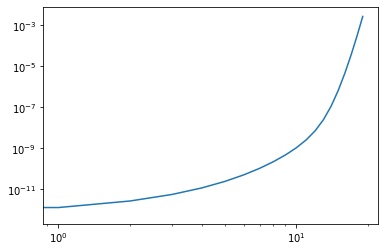

In [69]:
plt.loglog(np.array(list(map(mpf,df['tb']))),np.array(list(map(mpf,df['Whl2l3']))))